In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Load data
data = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize each data by diving each pixel to 256 shades of gray
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

In [ ]:
# Include channel dimension (grayscale so its only 1 dimension)
x_train_normalized = x_train_normalized.reshape(-1, 28, 28, 1)
x_test_normalized = x_test_normalized.reshape(-1, 28, 28, 1)

In [ ]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_normalized, y_train, test_size=0.2, random_state=42)

In [ ]:
# Using data augumentation to help the model to generalize better to new/unseen
# data by applying different varations of the same images in each epoch
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

In [ ]:
# Fit the data generator on the training data
datagen.fit(x_train)

In [ ]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
], name="cnn_model")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Set up early stopping to prevent overfitting
# in case the loss functions does not improve anymore
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train the model
# datagen.flow generates batches of real-time data augumentation
# Model evaluates its performance on x_val, y_val after each epoch
# Early callback
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          epochs=20,
          validation_data=(x_val, y_val),
          callbacks=[early_stopping])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.8073 - loss: 0.6054 - val_accuracy: 0.9547 - val_loss: 0.1438
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9464 - loss: 0.1718 - val_accuracy: 0.9743 - val_loss: 0.0813
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9570 - loss: 0.1349 - val_accuracy: 0.9750 - val_loss: 0.0866
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 36ms/step - accuracy: 0.9619 - loss: 0.1188 - val_accuracy: 0.9795 - val_loss: 0.0679
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 33ms/step - accuracy: 0.9663 - loss: 0.1093 - val_accuracy: 0.9763 - val_loss: 0.0768
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9671 - loss: 0.1013 - val_accuracy: 0.9831 - val_loss: 0.0564
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9689 - loss: 0.0971 - val_accuracy: 0.9815 - val_loss: 0.0625
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9722 - loss: 0.09

In [ ]:
# Evaluate the model
score = model.evaluate(x_test_normalized, y_test)
print(score)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9845 - loss: 0.0470
[0.040370602160692215, 0.9872000217437744]


In [ ]:
pred = model.predict(x_test_normalized)
pred_labels = tf.argmax(pred, axis=1)
print(pred_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
tf.Tensor([7 2 1 ... 4 5 6], shape=(10000,), dtype=int64)


In [ ]:
pred_labels[1].numpy()

2

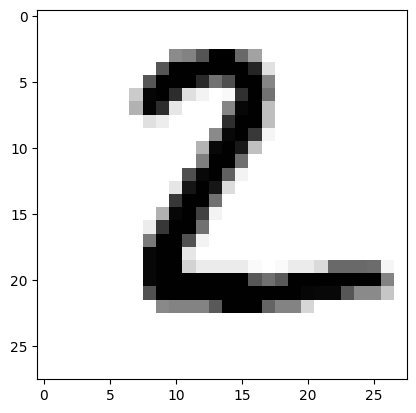

In [ ]:
plt.imshow(x_test_normalized[1], cmap = plt.cm.binary)
plt.show()

To do in the future:


*   Try automated hyperparameters tuning method
*   Add regularization in the layers
*   Increase model complexity





